# Qualitative Two Development Lab

In [149]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [150]:
filepath = "data/Credit Score Classification Dataset.csv"
df = pd.read_csv(filepath)
df.info()
df[['Marital Status','Education']].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             164 non-null    int64 
 1   Gender          164 non-null    object
 2   Income          164 non-null    int64 
 3   Education       164 non-null    object
 4   Marital Status  164 non-null    object
 5   Children        164 non-null    int64 
 6   Own             164 non-null    object
 7   Credit Rating   164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


Marital Status  Education          
Married         Bachelor's Degree      27
                Doctorate              25
                Master's Degree        20
Single          Associate's Degree     20
                High School Diploma    20
                Master's Degree        16
                Bachelor's Degree      15
Married         High School Diploma    10
Single          Doctorate               6
Married         Associate's Degree      5
Name: count, dtype: int64

In [151]:
data = df[['Marital Status','Education']]
s1 = data.iloc[:,0]
s2 = data.iloc[:,1]
obs = stats.contingency.crosstab(s1,s2)
obs
exp = stats.chi2_contingency(obs.count)
exp
d = {}
for col, data in zip(obs.elements[0], obs.count):
    d[col] = data 

df2 = pd.DataFrame(d)

df2.index = obs.elements[1]
df2
df3 = df2
d3 = {}
for col, data in zip(obs.elements[0], exp.expected_freq):
    d3[col] = data
df3 = pd.DataFrame(d3)
df3.index = obs.elements[1]
df3.reset_index(names=['education'], inplace=True)
df3

CrosstabResult(elements=(array(['Married', 'Single'], dtype=object), array(["Associate's Degree", "Bachelor's Degree", 'Doctorate',
       'High School Diploma', "Master's Degree"], dtype=object)), count=array([[ 5, 27, 25, 10, 20],
       [20, 15,  6, 20, 16]]))

Chi2ContingencyResult(statistic=27.34341791007928, pvalue=1.69407621859777e-05, dof=4, expected_freq=array([[13.26219512, 22.2804878 , 16.44512195, 15.91463415, 19.09756098],
       [11.73780488, 19.7195122 , 14.55487805, 14.08536585, 16.90243902]]))

,Married,Single
Associate's Degree,5,20
Bachelor's Degree,27,15
Doctorate,25,6
High School Diploma,10,20
Master's Degree,20,16


,education,Married,Single
0,Associate's Degree,13.26,11.74
1,Bachelor's Degree,22.28,19.72
2,Doctorate,16.45,14.55
3,High School Diploma,15.91,14.09
4,Master's Degree,19.10,16.90


In [152]:
df4 = pd.melt(df3, id_vars=['education'], value_vars=['Married', 'Single'], var_name='status', value_name='count')
df4['dataset'] = 'expected'
df4


,education,status,count,dataset
0,Associate's Degree,Married,13.26,expected
1,Bachelor's Degree,Married,22.28,expected
2,Doctorate,Married,16.45,expected
3,High School Diploma,Married,15.91,expected
4,Master's Degree,Married,19.10,expected
5,Associate's Degree,Single,11.74,expected
6,Bachelor's Degree,Single,19.72,expected
7,Doctorate,Single,14.55,expected
8,High School Diploma,Single,14.09,expected
9,Master's Degree,Single,16.90,expected


In [153]:
def combine_contingency_tables(df, obs, exp):
    d = {}
    for col, data in zip(obs.elements[0], obs.count):
        d[col] = data     
    dfo = pd.DataFrame(d)
    dfo.index = obs.elements[1]
    dfo.reset_index(inplace=True, names=[df.columns[1]])
    dfo['dataset'] = 'observed'
    
    d = {}
    for col, data in zip(obs.elements[0], exp.expected_freq):
        d[col] = data   
    dfe = pd.DataFrame(d)  
    dfe.index = obs.elements[1]
    dfe.reset_index(inplace=True, names=[df.columns[1]])
    dfe['dataset'] = 'expected'
    
    dfc = pd.concat([dfo,dfe], axis=0, ignore_index=True)
    print(dfc)
    dfc = pd.melt(dfc, id_vars=['dataset', df.columns[1]], value_vars=list(obs.elements[0]), var_name=df.columns[0], value_name='count')
    return dfc
    
    

In [154]:
data = df[['Marital Status','Education']]
s1 = data.iloc[:,0]
s2 = data.iloc[:,1]
obs = stats.contingency.crosstab(s1,s2)
obs
exp = stats.chi2_contingency(obs.count)
exp
dfc = combine_contingency_tables(data,obs,exp)

CrosstabResult(elements=(array(['Married', 'Single'], dtype=object), array(["Associate's Degree", "Bachelor's Degree", 'Doctorate',
       'High School Diploma', "Master's Degree"], dtype=object)), count=array([[ 5, 27, 25, 10, 20],
       [20, 15,  6, 20, 16]]))

Chi2ContingencyResult(statistic=27.34341791007928, pvalue=1.69407621859777e-05, dof=4, expected_freq=array([[13.26219512, 22.2804878 , 16.44512195, 15.91463415, 19.09756098],
       [11.73780488, 19.7195122 , 14.55487805, 14.08536585, 16.90243902]]))

             Education  Married  Single   dataset
0   Associate's Degree     5.00   20.00  observed
1    Bachelor's Degree    27.00   15.00  observed
2            Doctorate    25.00    6.00  observed
3  High School Diploma    10.00   20.00  observed
4      Master's Degree    20.00   16.00  observed
5   Associate's Degree    13.26   11.74  expected
6    Bachelor's Degree    22.28   19.72  expected
7            Doctorate    16.45   14.55  expected
8  High School Diploma    15.91   14.09  expected
9      Master's Degree    19.10   16.90  expected


<Axes: xlabel='Education', ylabel='count'>

<Axes: xlabel='Education', ylabel='count'>

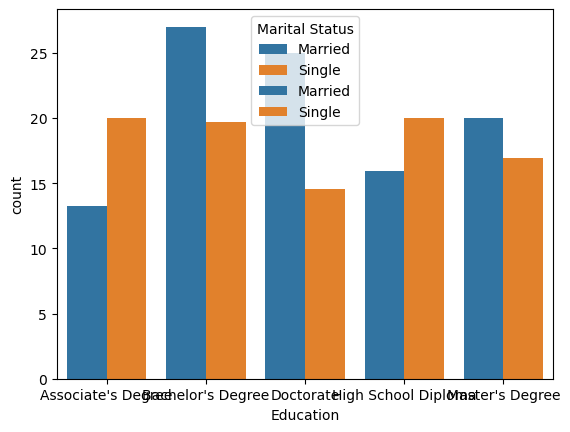

In [155]:
import seaborn as sns
dfo = dfc[dfc['dataset'] == 'observed']
dfe = dfc[dfc['dataset'] == 'expected']
sns.barplot(data=dfo,x=dfc.columns[1], y='count', hue=dfc.columns[2])
sns.barplot(data=dfe,x=dfe.columns[1], y='count', hue=dfe.columns[2])

In [156]:
dfo = dfo.drop(columns=['dataset'])
dfe = dfe.drop(columns=['dataset'])

dfo.rename(columns={'count': "observed"}, inplace=True)
dfe.rename(columns={'count': "expected"}, inplace=True)
dfe
dfo.loc[:,'expected'] = dfe['expected'].values
dfo

,Education,Marital Status,expected
5,Associate's Degree,Married,13.26
6,Bachelor's Degree,Married,22.28
7,Doctorate,Married,16.45
8,High School Diploma,Married,15.91
9,Master's Degree,Married,19.10
15,Associate's Degree,Single,11.74
16,Bachelor's Degree,Single,19.72
17,Doctorate,Single,14.55
18,High School Diploma,Single,14.09
19,Master's Degree,Single,16.90


,Education,Marital Status,observed,expected
0,Associate's Degree,Married,5.00,13.26
1,Bachelor's Degree,Married,27.00,22.28
2,Doctorate,Married,25.00,16.45
3,High School Diploma,Married,10.00,15.91
4,Master's Degree,Married,20.00,19.10
10,Associate's Degree,Single,20.00,11.74
11,Bachelor's Degree,Single,15.00,19.72
12,Doctorate,Single,6.00,14.55
13,High School Diploma,Single,20.00,14.09
14,Master's Degree,Single,16.00,16.90
